In [1]:
from functions import extract_LAI_from_RAS_file, explore_image, extract_all_LAI_from_RAS_file, extract_image_from_RAS_file, extract_image_from_RAS_file_cupd
import matplotlib.pyplot as plt
import torch
import numpy as np

/home/luser/anaconda3/envs/stelar/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
datapath = './dataset/lai_ras/'

In [3]:
image_length = 10980

image_width = 10980

select_image = 0

#for i in range(1):
#k=i+1
year = 20
month=1

In [4]:
import glob
filepaths = glob.glob('./dataset/lai_ras/*.RAS')

filepaths.sort()
filepaths = filepaths[:2]
print("filepaths", filepaths)

datapath_filename = filepaths[0]
filename = '32UQV_2001.RAS'
print("datapath_filename", datapath_filename)

filepaths ['./dataset/lai_ras/32UQV_2001.RAS', './dataset/lai_ras/32UQV_2002.RAS']
datapath_filename ./dataset/lai_ras/32UQV_2001.RAS


In [5]:
len(filepaths)

2

In [ ]:
for datapath_filename in filepaths:
    print("datapath_filename", datapath_filename)
    test = extract_all_LAI_from_RAS_file(datapath_filename, image_length, image_width)
    print(test.shape)

In [6]:
filename = '32UQV_2003.RAS'
image_length = 10980
image_width = 10980
select_image = 0
img, img_array = extract_image_from_RAS_file_cupd(datapath, filename, image_length, image_width, select_image)

In [ ]:
img

In [7]:
img_array.shape

(10980, 10980, 3)

In [8]:
import numpy as np

In [9]:
np.unique(img_array).shape

(159,)

In [10]:
# What to do next?

# Find out the maximuma and minimg of the three channels separately
# Create 10 pivot points for each channel 
# Then map all the values to the nearest pivot points for each channel
# Then combine the three channels together
# Then save the image as a .npy file


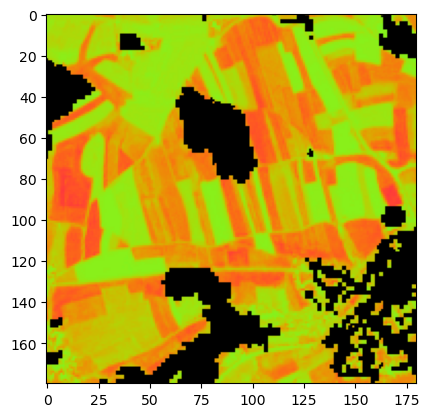

In [11]:
plt.imshow(img_array[:180,:180,:])

In [12]:
img_array[:,:,0].shape

(10980, 10980)

In [88]:
chnl_1_range = 4
chnl_2_range = 3
chnl_3_range = 3


ch0_dist = np.linspace(img_array[:,:,0].min(), img_array[:,:,0].max(), chnl_1_range).astype(int)
ch1_dist = np.linspace(img_array[:,:,1].min(), img_array[:,:,1].max(), chnl_2_range).astype(int)
ch2_dist = np.linspace(img_array[:,:,2].min(), img_array[:,:,2].max(), chnl_3_range).astype(int)

In [89]:
(ch0_dist)

array([  0,  85, 170, 255])

In [90]:
for i in range(len(ch0_dist)):
    img_array[:,:,0][abs(img_array[:,:,0] - ch0_dist[i]) <= ch0_dist[1]/2] = ch0_dist[i]

for i in range(len(ch1_dist)):
    img_array[:,:,1][abs(img_array[:,:,1] - ch1_dist[i]) <= ch1_dist[1]/2] = ch1_dist[i]

for i in range(len(ch2_dist)):
    img_array[:,:,2][abs(img_array[:,:,2] - ch2_dist[i]) <= ch2_dist[1]/2] = ch2_dist[i]

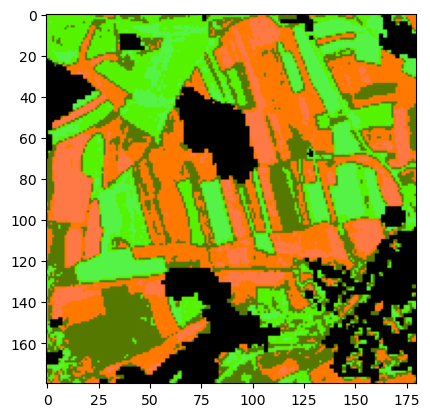

In [91]:
plt.imshow(img_array[:180,:180,:])

In [92]:
print(img_array[:,:,0].max())
print(img_array[:,:,0].min())

255
0


In [93]:
img_array.shape

(10980, 10980, 3)

In [94]:
img_array[0,0,:]

array([ 85, 243,   0], dtype=int16)

In [95]:
np.unique(img_array).shape

(7,)

In [96]:
#test_ch = img_array[:,:,0] + img_array[:,:,1] + img_array[:,:,2]

P1 = float(271)
P2 = float(293)
a=img_array[:,:,0]
b=img_array[:,:,1]
c=img_array[:,:,2]

test_ch = (a*P1 + b)*P2 + c

In [97]:
test_ch.shape

(10980, 10980)

In [98]:
test_ch_unqs = np.unique(test_ch)

In [99]:
test_ch_unqs[0]

0.0

In [100]:
test_ch_unqs.shape

(9,)

In [101]:
for i in range(len(test_ch_unqs)):
    test_ch[test_ch == test_ch_unqs[i]] = i


In [102]:
test_ch = test_ch.astype(int)

In [103]:
test_ch

array([[3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

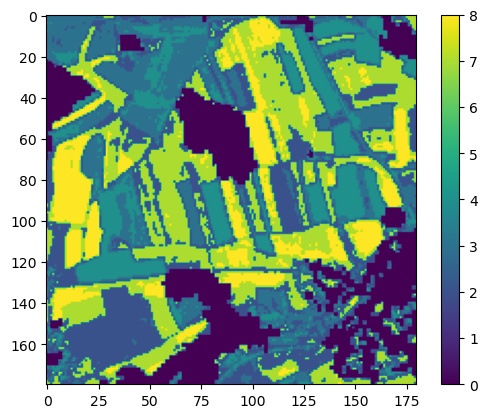

In [104]:
plt.imshow(test_ch[:180,:180])
plt.colorbar()

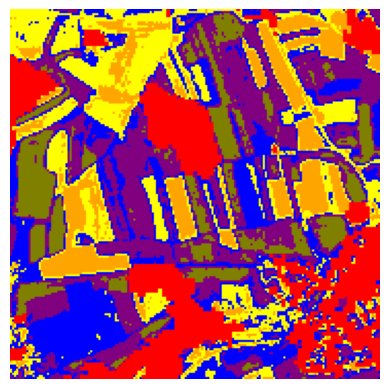

In [105]:
import numpy as np
import matplotlib.pyplot as plt

# Example segmented image (assuming it's already available)
segmented_image = np.array([[0, 0, 1, 1],
                            [0, 2, 2, 1],
                            [2, 2, 2, 1]])

segmented_image = test_ch[:180,:180]

color_map = {0: [255, 0, 0],        # Red
             1: [0, 255, 0],        # Green
             2: [0, 0, 255],        # Blue
             3: [255, 255, 0],      # Yellow
             4: [255, 165, 0],      # Orange
             5: [255, 0, 255],      # Magenta
             6: [0, 255, 255],      # Cyan
             7: [128, 0, 128],      # Violet
             8: [128, 128, 0],      # Olive
             9: [0, 128, 0],        # Dark Green
             10: [128, 0, 0]}       # Maroon


# Create color plot
colored_image = np.zeros(segmented_image.shape + (3,), dtype=np.uint8)
for i in range(segmented_image.shape[0]):
    for j in range(segmented_image.shape[1]):
        segment_id = segmented_image[i, j]
        colored_image[i, j] = color_map[segment_id]

# Display the color plot
plt.imshow(colored_image)
plt.axis('off')
plt.show()


In [106]:
img_array[:,:,0]

array([[85, 85, 85, ...,  0,  0,  0],
       [85, 85, 85, ...,  0,  0,  0],
       [85, 85, 85, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int16)

In [107]:
# find the nearest neighbours of img_array[:,:,0][0] in ch0_dist

set_a = ch0_dist

#find the nearest neighbour of the number 20 in set_a
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

find_nearest(set_a, 20)


0

In [25]:
img_array[:,:,0]

KeyboardInterrupt: 

In [19]:
ch2_dist

array([  0.        ,  15.55555556,  31.11111111,  46.66666667,
        62.22222222,  77.77777778,  93.33333333, 108.88888889,
       124.44444444, 140.        ])

In [37]:
np.unique(img_array[:,:,0])
# list the unique values in the increaing order of their population
np.unique(img_array[:,:,0], return_counts=True)


(array([  0, 128, 132, 137, 141, 145, 149, 154, 158, 162, 166, 170, 174,
        178, 182, 186, 190, 194, 197, 201, 204, 208, 211, 214, 216, 217,
        219, 221, 222, 223, 225, 226, 227, 229, 230, 231, 232, 234, 235,
        236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248,
        249, 250, 251, 252, 253, 254, 255], dtype=int16),
 array([83577352,   121200,   860870,  1657566,  1376250,  1148773,
         1047057,  1034876,  1056609,  1077619,  1086883,  1086538,
         1076147,  1060290,  1038990,  1016090,   986552,   957942,
          931084,   905289,   881419,   860356,   841891,   825461,
             609,   806828,      238,   787925,      288,   766858,
             365,   746138,      490,   723258,      755,   701320,
            1097,   685749,     2060,   663474,     2947,   639370,
            4821,   616796,     7253,   594936,    10572,   570394,
           15350,   547021,   539282,    28623,   531283,   466030,
          487651,   471758,   558558, 

In [28]:
img_array[:,:,0] = (img_array[:,:,0]/img_array[:,:,0].max())*10
img_array[:,:,1] = (img_array[:,:,1]/img_array[:,:,1].max())*10
img_array[:,:,2] = (img_array[:,:,2]/img_array[:,:,2].max())*10

(array([8.3577352e+07, 0.0000000e+00, 0.0000000e+00, 8.4700000e+02,
        2.8800000e+02, 3.6500000e+02, 1.2450000e+03, 1.0970000e+03,
        2.0600000e+03, 2.9470000e+03, 4.8210000e+03, 7.2530000e+03,
        1.0572000e+04, 1.5350000e+04, 0.0000000e+00, 2.1141000e+04,
        2.8623000e+04, 3.8299000e+04, 0.0000000e+00, 5.0523000e+04,
        6.4702000e+04, 0.0000000e+00, 8.2181000e+04, 1.0083400e+05,
        0.0000000e+00, 1.2227800e+05, 1.4495700e+05, 1.7067400e+05,
        0.0000000e+00, 1.9818800e+05, 0.0000000e+00, 2.2703100e+05,
        2.5646900e+05, 0.0000000e+00, 2.8498100e+05, 0.0000000e+00,
        3.1593600e+05, 3.4668500e+05, 0.0000000e+00, 3.7554300e+05,
        0.0000000e+00, 4.0705600e+05, 0.0000000e+00, 4.3712800e+05,
        4.6603000e+05, 0.0000000e+00, 4.9298400e+05, 0.0000000e+00,
        5.1814100e+05, 0.0000000e+00, 5.4702100e+05, 5.7039400e+05,
        0.0000000e+00, 5.9493600e+05, 0.0000000e+00, 6.1679600e+05,
        0.0000000e+00, 6.3937000e+05, 6.6347400e

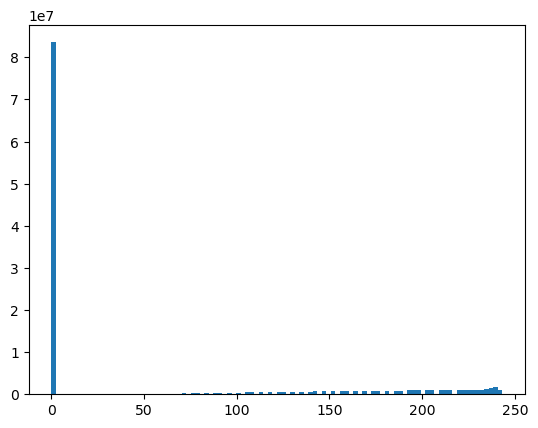

In [38]:
plt.hist(img_array[:,:,1].flatten(), bins=100)


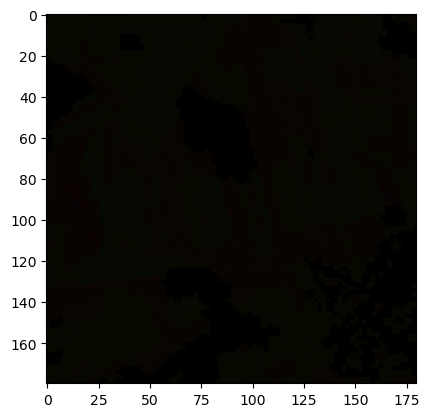

In [29]:
plt.imshow(img_array[:180,:180,:])

In [ ]:
img_arr_norm = img_array / img_array.max()

In [ ]:
rnd_cl_no = 10
img_arr_pre_seg = img_arr_norm*10

In [ ]:
# convert all the values in img_arr_pre_seg to integers
img_arr_pre_seg = img_arr_pre_seg.astype(int)

# replace the values in the third dimension with the average of the values of the third dimension
img_arr_pre_seg_avg = (img_arr_pre_seg[:,:,0] + img_arr_pre_seg[:,:,1] + img_arr_pre_seg[:,:,2])/3



In [ ]:
img_seg = img_arr_pre_seg_avg.astype(int)

In [ ]:
np.unique(img_seg)

In [ ]:
img_seg[img_seg==4] = 1
img_seg[img_seg==5] = 2
img_seg[img_seg==6] = 3
img_seg[img_seg==7] = 4

In [ ]:
plt.imshow(img_seg[:180,:180])


In [ ]:
#plot a histogram of the values in img_arr_pre_seg
plt.hist(img_arr_pre_seg.flatten(), bins=100)


In [ ]:
plt.imshow(img_arr_pre_seg)

In [ ]:
# plot a histogram of unique values
plt.hist(img_array.flatten(), bins=100)
plt.show()




In [ ]:
import numpy as np
from PIL import Image

# Assuming you have a NumPy array named "image_array" with shape (height, width, 3)
# where the last dimension represents the RGB channels

# Convert the NumPy array to a PIL Image
image = Image.fromarray(np.uint8(test))

# Save the image to a file
image.save("./showcase_images/output_image.png")


In [ ]:
import numpy as np
from PIL import Image


In [ ]:
image = toimage(arr, mode='L', high=255, low=0)


In [ ]:
test = torch.from_numpy(test)

In [ ]:
# plot the rgb image
plt.imshow(test.permute(0,1,2))



In [ ]:
filename = '32UQV_2002.RAS'
image_length = 10980
image_width = 10980
select_image = 0
test = extract_image_from_RAS_file(datapath, filename, image_length, image_width, select_image)

In [ ]:
192936//100